In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time
from numba import njit
from matplotlib.colors import LogNorm
import tqdm
import pickle 
from numba import jit



from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [3]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

In [4]:
GmtEtaLS133 = gmt_awk_LS133.gmtEta
GmtEtaLS263 = gmt_awk_LS263.gmtEta
GmtEtaLS264 = gmt_awk_LS264.gmtEta
GmtEtaLS306 = gmt_awk_LS306.gmtEta

GmtPhiLS133 = gmt_awk_LS133.gmtPhi
GmtPhiLS263 = gmt_awk_LS263.gmtPhi
GmtPhiLS264 = gmt_awk_LS264.gmtPhi
GmtPhiLS306 = gmt_awk_LS306.gmtPhi

GmtPtLS133 = gmt_awk_LS133.gmtPt
GmtPtLS263 = gmt_awk_LS263.gmtPt
GmtPtLS264 = gmt_awk_LS264.gmtPt
GmtPtLS306 = gmt_awk_LS306.gmtPt

GmtPtuLS133 = gmt_awk_LS133.gmtPtu
GmtPtuLS263 = gmt_awk_LS263.gmtPtu
GmtPtuLS264 = gmt_awk_LS264.gmtPtu
GmtPtuLS306 = gmt_awk_LS306.gmtPtu


nGmtMuonsLS133 = gmt_awk_LS133.nGmtMuons
nGmtMuonsLS263 = gmt_awk_LS263.nGmtMuons
nGmtMuonsLS264 = gmt_awk_LS264.nGmtMuons
nGmtMuonsLS306 = gmt_awk_LS306.nGmtMuons


GmtQualLS133 = gmt_awk_LS133.gmtQual
GmtQualLS263 = gmt_awk_LS263.gmtQual 
GmtQualLS264 = gmt_awk_LS264.gmtQual
GmtQualLS306 = gmt_awk_LS306.gmtQual

#-----------------------------------------------BMTF-----------------------------------------------

BmtfEtaLS133 = bmtf_awk_LS133.bmtfEta
BmtfEtaLS263 = bmtf_awk_LS263.bmtfEta
BmtfEtaLS264 = bmtf_awk_LS264.bmtfEta
BmtfEtaLS306 = bmtf_awk_LS306.bmtfEta

BmtfPhiLS133 = bmtf_awk_LS133.bmtfPhi
BmtfPhiLS263 = bmtf_awk_LS263.bmtfPhi
BmtfPhiLS264 = bmtf_awk_LS264.bmtfPhi
BmtfPhiLS306 = bmtf_awk_LS306.bmtfPhi

BmtfPtLS133 = bmtf_awk_LS133.bmtfPt
BmtfPtLS263 = bmtf_awk_LS263.bmtfPt
BmtfPtLS264 = bmtf_awk_LS264.bmtfPt
BmtfPtLS306 = bmtf_awk_LS306.bmtfPt

BmtfPtuLS133 = bmtf_awk_LS133.bmtfPtu
BmtfPtuLS263 = bmtf_awk_LS263.bmtfPtu
BmtfPtuLS264 = bmtf_awk_LS264.bmtfPtu
BmtfPtuLS306 = bmtf_awk_LS306.bmtfPtu


nBmtfMuonsLS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuonsLS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuonsLS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuonsLS306 = bmtf_awk_LS306.nBmtfMuons

BmtfQualLS133 = bmtf_awk_LS133.bmtfHwQual
BmtfQualLS263 = bmtf_awk_LS263.bmtfHwQual
BmtfQualLS264 = bmtf_awk_LS264.bmtfHwQual
BmtfQualLS306 = bmtf_awk_LS306.bmtfHwQual

GmtEta = ak.concatenate((GmtEtaLS133, GmtEtaLS263, GmtEtaLS264, GmtEtaLS306))
BmtfEta = ak.concatenate((BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306))
GmtPhi = ak.concatenate((GmtPhiLS133, GmtPhiLS263, GmtPhiLS264, GmtPhiLS306))
BmtfPhi = ak.concatenate((BmtfPhiLS133, BmtfPhiLS263, BmtfPhiLS264, BmtfPhiLS306))
GmtPt = ak.concatenate((GmtPtLS133, GmtPtLS263, GmtPtLS264, GmtPtLS306))
BmtfPt = ak.concatenate((BmtfPtLS133, BmtfPtLS263, BmtfPtLS264, BmtfPtLS306))
GmtPtu = ak.concatenate((GmtPtuLS133, GmtPtuLS263, GmtPtuLS264, GmtPtuLS306))
BmtfPtu = ak.concatenate((BmtfPtuLS133, BmtfPtuLS263, BmtfPtuLS264, BmtfPtuLS306))
nBmtfMuons = ak.concatenate((nBmtfMuonsLS133, nBmtfMuonsLS263, nBmtfMuonsLS264, nBmtfMuonsLS306))
nGmtMuons = ak.concatenate((nGmtMuonsLS133, nGmtMuonsLS263, nGmtMuonsLS264, nGmtMuonsLS306))
BmtfQual = ak.concatenate((BmtfQualLS133, BmtfQualLS263, BmtfQualLS264, BmtfQualLS306))
GmtQual = ak.concatenate((GmtQualLS133, GmtQualLS263, GmtQualLS264, GmtQualLS306))



In [5]:
def Delta(BMTF, GMT):
  return BMTF - GMT

def DeltaR(BmtfPhi, GmtPhi, BmtfEta, GmtEta):
  return np.sqrt((BmtfPhi - GmtPhi)**2 + (BmtfEta - GmtEta)**2)

def CheckDuplicates(j, IndexMin, DeltaRDist, DeltaRTemp, indexTemp):
  
  IndexMin.pop(j)
  #Creo una maschera per il vecchio minimo
  Mask = np.ones(DeltaRTemp.shape, dtype=bool)
  Mask[indexTemp] = False
  Sec_minDeltaR = np.min(DeltaRTemp[Mask])
  #Trovo il nuovo minimo, applicando la maschera a DeltaRTemp
  Sec_indexTemp = np.argwhere((DeltaRTemp == Sec_minDeltaR) & Mask)[0][0]

  DeltaRDist.append(Sec_minDeltaR)
  IndexMin.append(Sec_indexTemp)

  return DeltaRDist, IndexMin


In [6]:
'''Funzione per calcolare DeltaR e Pt'''
def DeltaRDist(nBmtfMuons, nGmtMuons, Bmtf_Phi, Gmt_Phi, Bmtf_Eta, Gmt_Eta, Bmtf_Pt, Gmt_Pt, Bmtf_Ptu, Gmt_Ptu, Number):
  MuonsProperties = []

  for i in tqdm.tqdm(range(Number)):

    #Fare in questo modo ottimizza enormemente il processo!
    nBmtfM, nGmtM = nBmtfMuons[i], nGmtMuons[i]
    ArrBmtfPhi, ArrBmtfEta = ak.to_numpy(Bmtf_Phi[i]), ak.to_numpy(Bmtf_Eta[i])
    ArrGmtPhi, ArrGmtEta = ak.to_numpy(Gmt_Phi[i]), ak.to_numpy(Gmt_Eta[i])
    ArrBmtfPt, ArrGmtPt = ak.to_numpy(Bmtf_Pt[i]), ak.to_numpy(Gmt_Pt[i])
    #ArrBmtfPtu, ArrGmtPtu = ak.to_numpy(Bmtf_Ptu[i]), ak.to_numpy(Gmt_Ptu[i])


    DeltaRDistBMTF, DeltaRDistGMT = [], []
    IndexMinBMTF, IndexMinGMT = [], []
    PtBMTF, PtGMT = [], []
    #PtuBMTF, PtuGMT = [], []

    ArrDeltaPhiBMTF, ArrDeltaEtaBMTF = [], []
    ArrDeltaPhiGMT, ArrDeltaEtaGMT = [], []


    #Controllo globale dei match 
    if nGmtM == 0 and nBmtfM == 0:
      unmatched_Bmtf = []
      unmatched_Gmt = []
    
    elif nBmtfM == 0:
      unmatched_Bmtf = []
      unmatched_Gmt = [i for i in range(nGmtM)]

    elif nGmtM == 0:
      unmatched_Bmtf = [i for i in range(nBmtfM)]
      unmatched_Gmt = []


    else:
      #Primo metodo 
      for j in range(nBmtfM):

        #Calcolo il DeltaR
        DeltaRTemp = DeltaR(ArrBmtfPhi[j], ArrGmtPhi[:], ArrBmtfEta[j], ArrGmtEta[:])

        #Attento a come sono definiti IndexMin nei vari casi! Nel primo caso è confronto con tutti i muoni del GMT!
        minDeltaR = np.min(DeltaRTemp)
        indexTempGMT = np.argmin(DeltaRTemp)
        IndexMinGMT.append(indexTempGMT)

        if minDeltaR < 0.4:
          
          #Controllo che non vengano assegnati gli stessi indici dei minimi a muoni diversi
          if IndexMinGMT[j] in IndexMinGMT[:j] and nBmtfM == nGmtM:

            DeltaRDistBMTF, IndexMinGMT = CheckDuplicates(j, IndexMinGMT, DeltaRDistBMTF, DeltaRTemp, indexTempGMT)
                        
          else:
            DeltaRDistBMTF.append(minDeltaR)

          I = IndexMinGMT[j]

          #Salvataggio nel rispettivo BX degli eventi con match
          DeltaPhi_BMTF = Delta(ArrBmtfPhi[j], ArrGmtPhi[I])
          DeltaEta_BMTF = Delta(ArrBmtfEta[j], ArrGmtEta[I])
          ArrDeltaPhiBMTF.append(DeltaPhi_BMTF)
          ArrDeltaEtaBMTF.append(DeltaEta_BMTF)

          
        else:
          #Se DeltaR > 0.4 (primo metodo) non c'è match con i muoni del GMT
          unmatched_Gmt = [i for i in range(nGmtM)]
    
      
        matched_Bmtf_Index = [i for i in IndexMinGMT if IndexMinGMT]
        unmatched_Bmtf = [i for i in range(nBmtfM) if i not in matched_Bmtf_Index]
        

      #Secondo metodo 
      for k in range(nGmtM):
        DeltaRTemp = DeltaR(ArrBmtfPhi[:], ArrGmtPhi[k], ArrBmtfEta[:], ArrGmtEta[k])

        minDeltaR = np.min(DeltaRTemp)
        indexTempBMTF = np.argmin(DeltaRTemp)
        IndexMinBMTF.append(indexTempBMTF)

        if minDeltaR < 0.4:
          
          #Controllo duplicati 
          if IndexMinBMTF[k] in IndexMinBMTF[:k] and nBmtfM == nGmtM:
          
            DeltaRDistGMT, IndexMinBMTF = CheckDuplicates(k, IndexMinBMTF, DeltaRDistGMT, DeltaRTemp, indexTempBMTF)
          
          else:
            DeltaRDistGMT.append(minDeltaR)

          I = IndexMinBMTF[k]

          #Salvataggio nel rispettivo BX degli eventi con match
          DeltaPhi_GMT = Delta(ArrBmtfPhi[I], ArrGmtPhi[k])
          DeltaEta_GMT = Delta(ArrBmtfEta[I], ArrGmtEta[k])
          ArrDeltaPhiGMT.append(DeltaPhi_GMT)
          ArrDeltaEtaGMT.append(DeltaEta_GMT)
          PtBMTF.append(ArrBmtfPt[I])
          PtGMT.append(ArrGmtPt[k])

          
        else:
          unmatched_Bmtf = [i for i in range(nBmtfM)]

    #Salvataggio nel dizionario
    Events = {
      'unmatched_Gmt_Events' : unmatched_Gmt,
      'unmatched_Bmtf_Events': unmatched_Bmtf, 
      'nGmtMuons': nGmtM,
      'nBmtfMuons': nBmtfM,
      #DeltaPhi, DeltaEta dei due metodi
      'DeltaPhiBMTF': ArrDeltaPhiBMTF,
      'DeltaEtaBMTF': ArrDeltaEtaBMTF,
      'DeltaPhiGMT': ArrDeltaPhiGMT,
      'DeltaEtaGMT': ArrDeltaEtaGMT,
      #Solo i Pt che hanno fatto il match
      'PtBMTF': PtBMTF,
      'PtGMT': PtGMT, 
       #tutti i Pt
      'AllPtBMTF': ArrBmtfPt,
      'AllPtGMT': ArrGmtPt,

    }

    MuonsProperties.append(Events)


  return MuonsProperties

In [7]:
'''Funzione per calcolare solo Phi, Eta, Qual degli eventi con match'''
def MatchingDist(nBmtfMuons, nGmtMuons, Bmtf_Phi, Gmt_Phi, Bmtf_Eta, Gmt_Eta, Bmtf_Qual, Gmt_Qual, Number):
  MuonsPropertiesMatchingEff = []

  for i in tqdm.tqdm(range(Number)):

    #Fare in questo modo ottimizza enormemente il processo!
    nBmtfM, nGmtM = nBmtfMuons[i], nGmtMuons[i]
    ArrBmtfPhi, ArrBmtfEta = ak.to_numpy(Bmtf_Phi[i]), ak.to_numpy(Bmtf_Eta[i])
    ArrGmtPhi, ArrGmtEta = ak.to_numpy(Gmt_Phi[i]), ak.to_numpy(Gmt_Eta[i])
    ArrBmtfQual, ArrGmtQual = ak.to_numpy(Bmtf_Qual[i]), ak.to_numpy(Gmt_Qual[i])

    DeltaRDistGMT = []
    IndexMinBMTF = []
    PhiGMT, PhiBMTF = [], []
    EtaGMT, EtaBMTF = [], []
    QualGMT, QualBMTF = [], []


    #Controllo globale dei match 
    if nGmtM == 0 and nBmtfM == 0:
      unmatched_Bmtf = []
      unmatched_Gmt = []
    
    elif nBmtfM == 0:
      unmatched_Bmtf = []
      unmatched_Gmt = [i for i in range(nGmtM)]

    elif nGmtM == 0:
      unmatched_Bmtf = [i for i in range(nBmtfM)]
      unmatched_Gmt = []


    else:
       
      for k in range(nGmtM):
        DeltaRTemp = DeltaR(ArrBmtfPhi[:], ArrGmtPhi[k], ArrBmtfEta[:], ArrGmtEta[k])

        minDeltaR = np.min(DeltaRTemp)
        indexTempBMTF = np.argmin(DeltaRTemp)
        IndexMinBMTF.append(indexTempBMTF)

        if minDeltaR < 0.4:
          
          #Controllo duplicati 
          if IndexMinBMTF[k] in IndexMinBMTF[:k] and nBmtfM == nGmtM:
          
            DeltaRDistGMT, IndexMinBMTF = CheckDuplicates(k, IndexMinBMTF, DeltaRDistGMT, DeltaRTemp, indexTempBMTF)
          
          else:
            DeltaRDistGMT.append(minDeltaR)

          I = IndexMinBMTF[k]

          #Salvataggio nel rispettivo BX degli eventi con match

          PhiBMTF.append(ArrBmtfPhi[I])
          PhiGMT.append(ArrGmtPhi[k])
          EtaBMTF.append(ArrBmtfEta[I])
          EtaGMT.append(ArrGmtEta[k])
          QualBMTF.append(ArrBmtfQual[I])
          QualGMT.append(ArrGmtQual[k])
          
        else:
          unmatched_Bmtf = [i for i in range(nBmtfM)]

    #Salvataggio nel dizionario
    Events = {
      'unmatched_Gmt_Events' : unmatched_Gmt,
      'unmatched_Bmtf_Events': unmatched_Bmtf, 
      'nGmtMuons': nGmtM,
      'nBmtfMuons': nBmtfM,

      'AllQualBMTF': ArrBmtfQual, 
      'AllQualGMT': ArrGmtQual, 
      'AllPhiBmtf': ArrBmtfPhi,
      'AllPhiGmt': ArrGmtPhi,
      'AllEtaBmtf': ArrBmtfEta,
      'AllEtaGmt': ArrGmtEta,

      'QualBmtf': QualBMTF, 
      'QualGmt': QualGMT, 
      'PhiBmtf': PhiBMTF,
      'PhiGmt': PhiGMT,
      'EtaBmtf': EtaBMTF,
      'EtaGmt': EtaGMT 

    }

    MuonsPropertiesMatchingEff.append(Events)


  return MuonsPropertiesMatchingEff

In [8]:
MuonsProperties = DeltaRDist(nBmtfMuons, nGmtMuons, BmtfPhi, GmtPhi, BmtfEta, GmtEta, BmtfPt, GmtPt, BmtfPtu, GmtPtu, Number = 10_000)
#MuonMatchEff_LS133 = MatchingDist(nBmtfMuonsLS133, nGmtMuonsLS133, BmtfPhiLS133, GmtPhiLS133, BmtfEtaLS133, GmtEtaLS133, BmtfQualLS133, GmtQualLS133, Number = len(nBmtfMuonsLS133))8

100%|██████████| 10000/10000 [00:01<00:00, 5343.45it/s]


In [9]:
#Save Dictionary
# with open('MuonMatchEff_LS133.pkl', 'wb') as f:
#     pickle.dump(MuonMatchEff_LS133, f)

In [10]:
#MuonMatchEff = ak.concatenate([MuonMatchEff_LS133, MuonMatchEff_LS263, MuonMatchEff_LS264, MuonMatchEff_LS306])

In [11]:
# #Save Dictionary
# with open('MuonMatchEff.pkl', 'wb') as f:
#     pickle.dump(MuonMatchEff, f)

In [12]:
#Open Dictionary 

with open('MuonsProperties.pkl', 'rb') as f:
    MuonsProperties = pickle.load(f)

with open('MuonMatchEff.pkl', 'rb') as f:
    MuonMatchEff = pickle.load(f)


In [13]:
print("# of unmatched BMTF = ", ak.sum(ak.num(MuonsProperties.unmatched_Bmtf_Events)))
print("# of unmatched GMT = ", ak.sum(ak.num(MuonsProperties.unmatched_Gmt_Events)))

Tot_Unmatched_GMT = ak.sum(ak.num(MuonsProperties.unmatched_Gmt_Events))
Tot_Unmatched_BMTF = ak.sum(ak.num(MuonsProperties.unmatched_Bmtf_Events))

Tot_Matched_GMT = ak.sum(MuonsProperties.nGmtMuons)
Tot_Matched_BMTF = ak.sum(MuonsProperties.nBmtfMuons)

fractionBMTF = Tot_Unmatched_BMTF / Tot_Matched_BMTF * 100
fractionGMT = Tot_Unmatched_GMT / Tot_Matched_GMT * 100

print(f"unmatchedGMT: {fractionGMT:.2f}, unmatchedBMTF: {fractionBMTF:.2f}")

# of unmatched BMTF =  126193
# of unmatched GMT =  4914
unmatchedGMT: 0.23, unmatchedBMTF: 5.58


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_98743/1363071608.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 200)
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_98743/1363071608.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


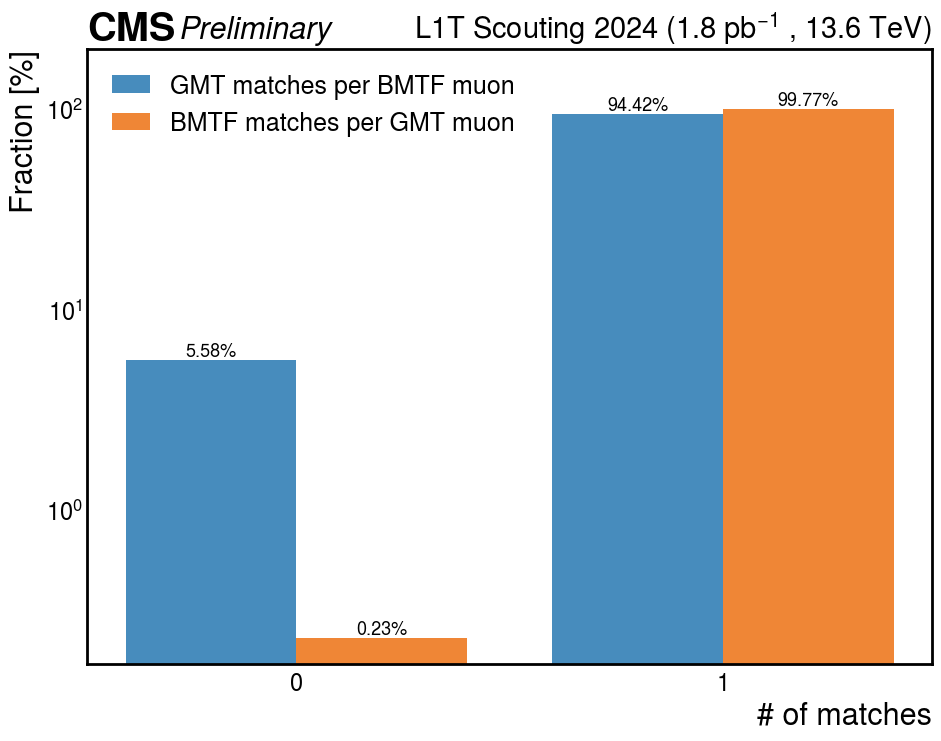

In [14]:

categories = ['0', '1']
gmt_matches = [5.58, 100-5.58]   # Percentuali di corrispondenza per GMT matches per BMTF muon
bmtf_matches = [0.23, 100 - 0.23]

# Imposta larghezza barre
bar_width = 0.4
index = np.arange(len(categories))

# Crea il grafico a barre
fig, ax = plt.subplots(figsize = FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)

draw_cms_label(ax, fontsize= FONTSIZE)

bar1 = ax.bar(index, gmt_matches, bar_width, label='GMT matches per BMTF muon', color='#478CBD')
bar2 = ax.bar(index + bar_width, bmtf_matches, bar_width, label='BMTF matches per GMT muon', color='#EF8636')

# Imposta scala logaritmica per l'asse y
ax.set_yscale('log')

# Aggiungi etichette, titolo e personalizzazioni
ax.set_xlabel('# of matches', fontsize = FONTSIZE)
ax.set_ylabel('Fraction [%]', fontsize = FONTSIZE)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend(fontsize = FONTSIZE-4)

# Aggiungi annotazioni sulle barre
for rect, label in zip(bar1, gmt_matches):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom', fontsize=13)

for rect, label in zip(bar2, bmtf_matches):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{label:.2f}%', ha='center', va='bottom', fontsize=13)


ax.set_ylim(0, 200)

ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5, length = 0)

# Mostra il grafico

#plt.savefig("../Immagini/Percentile.pdf")

plt.tight_layout()
plt.show()

In [15]:
#----------------------------Pt---------------------------------
PtBMTF = ak.flatten(MuonsProperties.PtBMTF)
PtGMT = ak.flatten(MuonsProperties.PtGMT)

AllPtBMTF = ak.flatten(MuonsProperties.AllPtBMTF)
AllPtGMT = ak.flatten(MuonsProperties.AllPtGMT)

#----------------------------Phi---------------------------------
PhiBMTF = ak.flatten(MuonMatchEff.PhiBmtf)
PhiGMT = ak.flatten(MuonMatchEff.PhiGmt)

AllPhiBMTF = ak.flatten(MuonMatchEff.AllPhiBmtf)
AllPhiGMT = ak.flatten(MuonMatchEff.AllPhiGmt)

#----------------------------Eta---------------------------------
EtaBMTF = ak.flatten(MuonMatchEff.EtaBmtf)
EtaGMT = ak.flatten(MuonMatchEff.EtaGmt)

AllEtaBMTF = ak.flatten(MuonMatchEff.AllEtaBmtf)
AllEtaGMT = ak.flatten(MuonMatchEff.AllEtaGmt)

#----------------------------Qual---------------------------------
QualBMTF = ak.flatten(MuonMatchEff.QualBmtf)
QualGMT = ak.flatten(MuonMatchEff.QualGmt)

AllQualBMTF = ak.flatten(MuonMatchEff.AllQualBMTF)
AllQualGMT = ak.flatten(MuonMatchEff.AllQualGMT)

In [16]:
bins = np.array([0, 5, 10, 15, 20, 30, 40, 50, 100, 300])

#-------------------------Histograms---------------------------------
PtBMTF_Hist = hist.Hist(hist.axis.Variable(bins, name="pTBMTF", label="BMTF Muon pT [GeV]"))
AllPtBMTF_Hist = hist.Hist(hist.axis.Variable(bins, name="AllpTBMTF", label="BMTF Muon pT [GeV]"))
PtGMT_Hist = hist.Hist(hist.axis.Variable(bins, name="pTGMT", label="GMT Muon pT [GeV]"))
AllPtGMT_Hist = hist.Hist(hist.axis.Variable(bins, name="AllpTGMT", label="GMT Muon pT [GeV]"))


PtBMTF_Hist.fill(pTBMTF=PtBMTF)
AllPtBMTF_Hist.fill(AllpTBMTF=AllPtBMTF)

BMTFMatchingEfficiencyPt = PtBMTF_Hist.values()/AllPtBMTF_Hist.values()


PtGMT_Hist.fill(pTGMT=PtGMT)
AllPtGMT_Hist.fill(AllpTGMT=AllPtGMT)

GMTMatchingEfficiencyPt = PtGMT_Hist.values()/AllPtGMT_Hist.values()

print(PtBMTF_Hist)

                    ┌────────────────────────────────────────────────────────┐
[-inf,   0) 0       │                                                        │
[   0,   5) 1144882 │███████████████████████████████████████████████████████ │
[   5,  10) 825640  │███████████████████████████████████████▋                │
[  10,  15) 119435  │█████▊                                                  │
[  15,  20) 24994   │█▎                                                      │
[  20,  30) 11825   │▋                                                       │
[  30,  40) 3334    │▏                                                       │
[  40,  50) 1531    │▏                                                       │
[  50, 100) 2013    │▏                                                       │
[ 100, 300) 1445    │▏                                                       │
[ 300, inf) 0       │                                                        │
                    └───────────────────────────────

In [17]:
binsPhi = np.array(np.arange(-np.pi, np.pi + 0.1, 0.52))

#-------------------------Histograms---------------------------------
PhiBMTF_Hist = hist.Hist(hist.axis.Variable(binsPhi, name="PhiBMTF", label="BMTF Muon Phi"))
AllPhiBMTF_Hist = hist.Hist(hist.axis.Variable(binsPhi, name="AllPhiBMTF", label="BMTF Muon Phi"))
PhiGMT_Hist = hist.Hist(hist.axis.Variable(binsPhi, name="PhiGMT", label="GMT Muon Phi"))
AllPhiGMT_Hist = hist.Hist(hist.axis.Variable(binsPhi, name="AllPhiGMT", label="GMT Muon Phi"))


PhiBMTF_Hist.fill(PhiBMTF=PhiBMTF)
AllPhiBMTF_Hist.fill(AllPhiBMTF=AllPhiBMTF)

BMTFMatchingEfficiencyPhi = PhiBMTF_Hist.values()/AllPhiBMTF_Hist.values()


PhiGMT_Hist.fill(PhiGMT=PhiGMT)
AllPhiGMT_Hist.fill(AllPhiGMT=AllPhiGMT)

GMTMatchingEfficiencyPhi = PhiGMT_Hist.values()/AllPhiGMT_Hist.values()

print(BMTFMatchingEfficiencyPhi)

print(PhiBMTF_Hist)


[0.94283549 0.95546875 0.96136852 0.96376673 0.94648153 0.93834264
 0.93447377 0.93287113 0.92687645 0.93533286 0.94566506 0.94440414]
                            ┌────────────────────────────────────────────────┐
[    -inf,   -3.142) 0      │                                                │
[  -3.142,   -2.622) 169189 │███████████████████████████████████████████▍    │
[  -2.622,   -2.102) 183450 │███████████████████████████████████████████████ │
[  -2.102,   -1.582) 182984 │██████████████████████████████████████████████▉ │
[  -1.582,   -1.062) 176351 │█████████████████████████████████████████████▏  │
[  -1.062,  -0.5416) 182546 │██████████████████████████████████████████████▊ │
[ -0.5416, -0.02159) 182000 │██████████████████████████████████████████████▋ │
[-0.02159,   0.4984) 177864 │█████████████████████████████████████████████▋  │
[  0.4984,    1.018) 168595 │███████████████████████████████████████████▎    │
[   1.018,    1.538) 161004 │█████████████████████████████████████████▎    

In [18]:
binsEta = np.array(np.arange(-1, 1.1, 0.2))

#-------------------------Histograms---------------------------------
EtaBMTF_Hist = hist.Hist(hist.axis.Variable(binsEta, name="EtaBMTF", label="BMTF Muon Eta"))
AllEtaBMTF_Hist = hist.Hist(hist.axis.Variable(binsEta, name="AllEtaBMTF", label="BMTF Muon Eta"))
EtaGMT_Hist = hist.Hist(hist.axis.Variable(binsEta, name="EtaGMT", label="GMT Muon Eta"))
AllEtaGMT_Hist = hist.Hist(hist.axis.Variable(binsEta, name="AllEtaGMT", label="GMT Muon Eta"))

EtaBMTF_Hist.fill(EtaBMTF=EtaBMTF)
AllEtaBMTF_Hist.fill(AllEtaBMTF=AllEtaBMTF)

BMTFMatchingEfficiencyEta = EtaBMTF_Hist.values()/AllEtaBMTF_Hist.values()


EtaGMT_Hist.fill(EtaGMT=EtaGMT)
AllEtaGMT_Hist.fill(AllEtaGMT=AllEtaGMT)

GMTMatchingEfficiencyEta = EtaGMT_Hist.values()/AllEtaGMT_Hist.values()

print(EtaGMT_Hist)

                    ┌────────────────────────────────────────────────────────┐
[-inf,   -1) 11     │                                                        │
[  -1, -0.8) 68002  │███████████▎                                            │
[-0.8, -0.6) 229488 │██████████████████████████████████████▏                 │
[-0.6, -0.4) 316256 │████████████████████████████████████████████████████▌   │
[-0.4, -0.2) 185448 │██████████████████████████████▊                         │
[-0.2,    0) 188254 │███████████████████████████████▎                        │
[   0,  0.2) 322522 │█████████████████████████████████████████████████████▋  │
[ 0.2,  0.4) 190770 │███████████████████████████████▊                        │
[ 0.4,  0.6) 331060 │███████████████████████████████████████████████████████ │
[ 0.6,  0.8) 233835 │██████████████████████████████████████▉                 │
[ 0.8,    1) 69437  │███████████▌                                            │
[   1,  inf) 16     │                               

In [19]:
binsQual = np.array(np.arange(12, 17, 1))
#-------------------------Histograms---------------------------------
QualBMTF_Hist = hist.Hist(hist.axis.Variable(binsQual, name="QualBMTF", label="BMTF Muon Qual"))
AllQualBMTF_Hist = hist.Hist(hist.axis.Variable(binsQual, name="AllQualBMTF", label="BMTF Muon Qual"))
QualGMT_Hist = hist.Hist(hist.axis.Variable(binsQual, name="QualGMT", label="GMT Muon Qual"))
AllQualGMT_Hist = hist.Hist(hist.axis.Variable(binsQual, name="AllQualGMT", label="GMT Muon Qual"))

QualBMTF_Hist.fill(QualBMTF=QualBMTF)
AllQualBMTF_Hist.fill(AllQualBMTF=AllQualBMTF)

BMTFMatchingEfficiencyQual = QualBMTF_Hist.values()/AllQualBMTF_Hist.values()


QualGMT_Hist.fill(QualGMT=QualGMT)
AllQualGMT_Hist.fill(AllQualGMT=AllQualGMT)

GMTMatchingEfficiencyQual = QualGMT_Hist.values()/AllQualGMT_Hist.values()

print(QualBMTF_Hist)

                    ┌────────────────────────────────────────────────────────┐
[-inf,  12) 0       │                                                        │
[  12,  13) 1024947 │███████████████████████████████████████████████████████ │
[  13,  14) 787863  │██████████████████████████████████████████▎             │
[  14,  15) 235317  │████████████▋                                           │
[  15,  16) 86972   │████▋                                                   │
[  16, inf) 0       │                                                        │
                    └────────────────────────────────────────────────────────┘


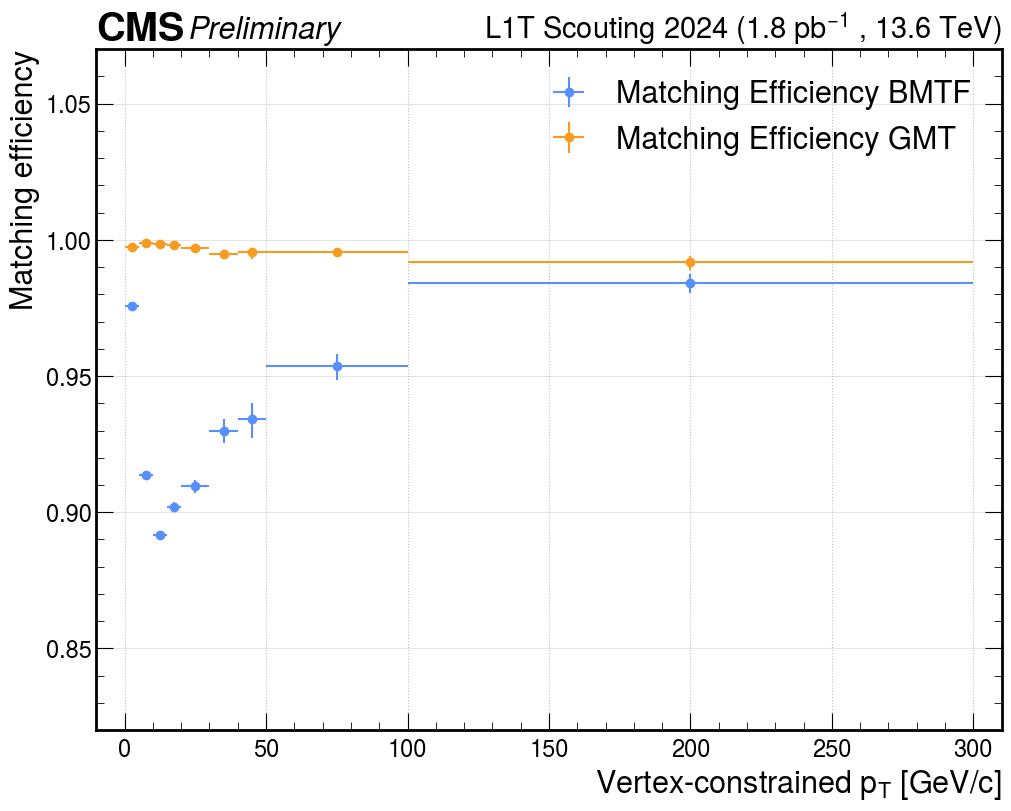

In [20]:
from hist import intervals
BMTFerror = hist.intervals.ratio_uncertainty(PtBMTF_Hist.values(), AllPtBMTF_Hist.values(), uncertainty_type = 'efficiency')
GMTerror = hist.intervals.ratio_uncertainty(PtGMT_Hist.values(), AllPtGMT_Hist.values(), uncertainty_type = 'efficiency')

centers = 0.5 * (bins[1:] + bins[:-1])
width = 0.5 * (bins[1:] - bins[:-1])

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

ax.errorbar(centers, BMTFMatchingEfficiencyPt, xerr = width, yerr = BMTFerror, fmt = 'o', label="Matching Efficiency BMTF")
ax.errorbar(centers, GMTMatchingEfficiencyPt, xerr = width, yerr = GMTerror, fmt = 'o', label="Matching Efficiency GMT")

ax.set_ylim(0.82, 1.07)
ax.set_xlim(-10, 310)


ax.set_xlabel(r'Vertex-constrained $p_T$ [GeV/c]')
ax.set_ylabel('Matching efficiency')
ax.grid(True)
ax.legend(fontsize = FONTSIZE)

ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5)

plt.savefig("../Immagini/PtMatchingEfficiency.pdf")

plt.show()



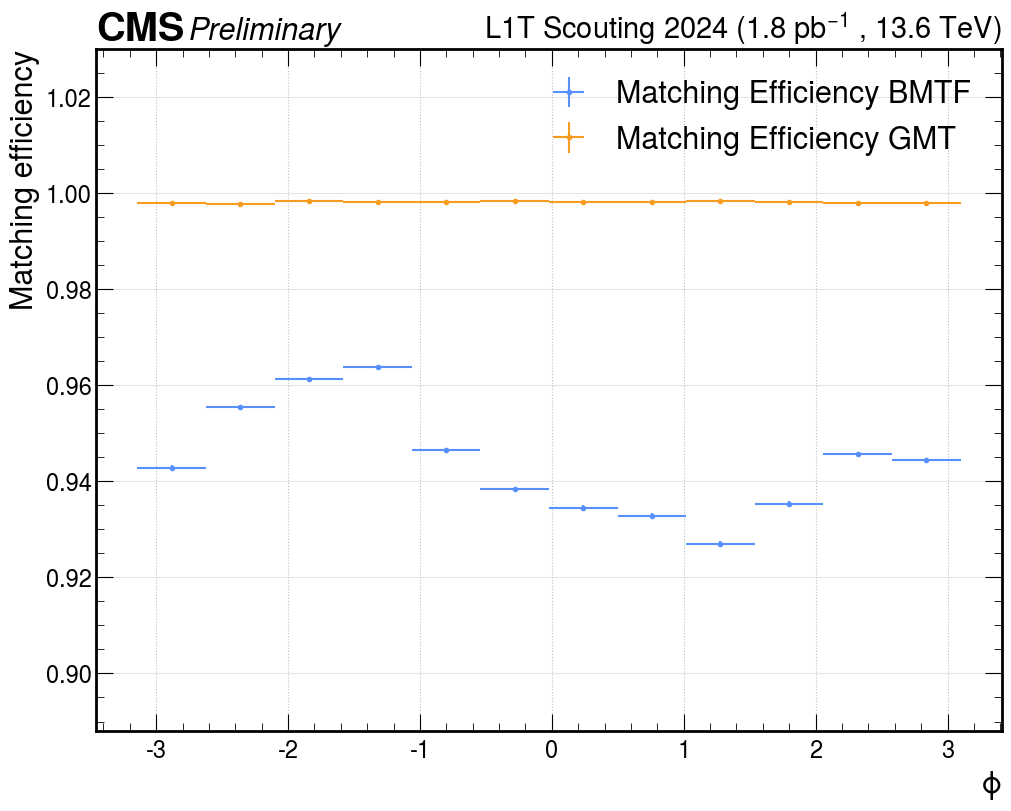

In [21]:
from hist import intervals
BMTFerror = hist.intervals.ratio_uncertainty(PhiBMTF_Hist.values(), AllPhiBMTF_Hist.values(), uncertainty_type = 'efficiency')
GMTerror = hist.intervals.ratio_uncertainty(PhiGMT_Hist.values(), AllPhiGMT_Hist.values(), uncertainty_type = 'efficiency')

centers = 0.5 * (binsPhi[1:] + binsPhi[:-1])
width = 0.5 * (binsPhi[1:] - binsPhi[:-1])

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

ax.errorbar(centers, BMTFMatchingEfficiencyPhi, xerr = width, yerr = BMTFerror, fmt = '.', label="Matching Efficiency BMTF")
ax.errorbar(centers, GMTMatchingEfficiencyPhi, xerr = width, yerr = GMTerror, fmt = '.', label="Matching Efficiency GMT")

ax.set_ylim(0.888, 1.03)
#ax.set_xlim(-10, 310)


ax.set_xlabel(r'$\phi$')
ax.set_ylabel('Matching efficiency')
ax.grid(True)
ax.legend(fontsize = FONTSIZE)

ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5)

plt.savefig("../Immagini/PhiMatchingEfficiency.pdf")


plt.show()

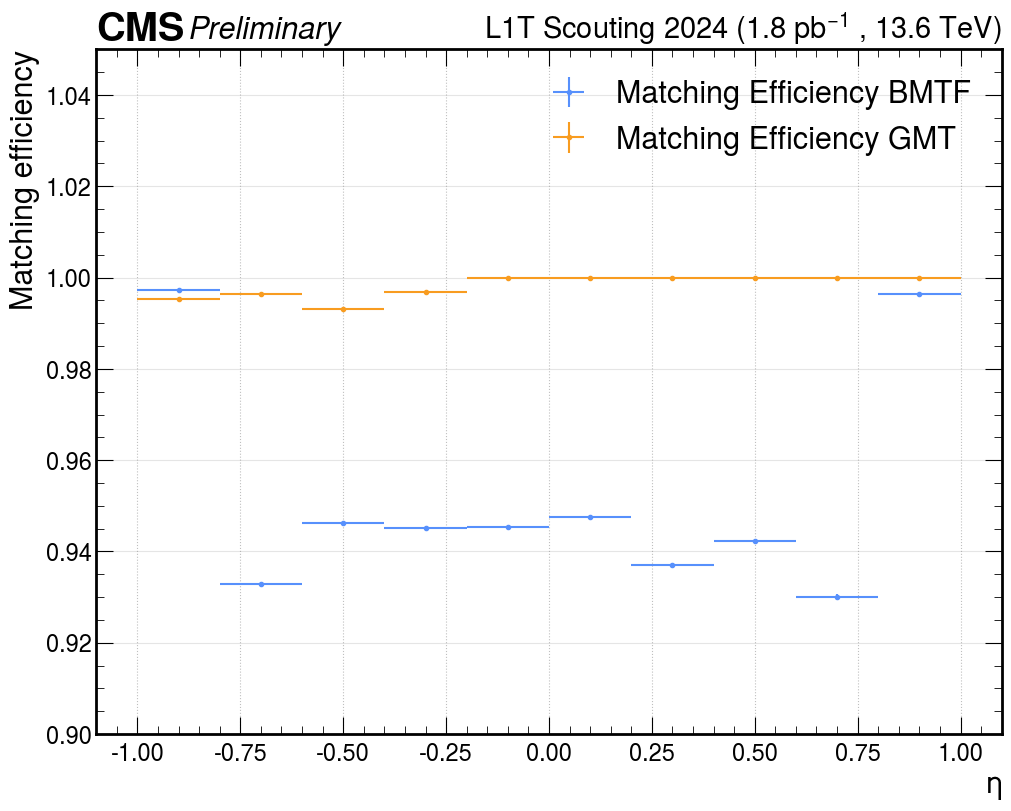

In [22]:
from hist import intervals
BMTFerror = hist.intervals.ratio_uncertainty(EtaBMTF_Hist.values(), AllEtaBMTF_Hist.values(), uncertainty_type = 'efficiency')
GMTerror = hist.intervals.ratio_uncertainty(EtaGMT_Hist.values(), AllEtaGMT_Hist.values(), uncertainty_type = 'efficiency')

centers = 0.5 * (binsEta[1:] + binsEta[:-1])
width = 0.5 * (binsEta[1:] - binsEta[:-1])

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

ax.errorbar(centers, BMTFMatchingEfficiencyEta, xerr = width, yerr = BMTFerror, fmt = '.', label="Matching Efficiency BMTF")
ax.errorbar(centers, GMTMatchingEfficiencyEta, xerr = width, yerr = GMTerror, fmt = '.', label="Matching Efficiency GMT")

ax.set_ylim(0.9, 1.05)
#ax.set_xlim(-10, 310)


ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Matching efficiency')
ax.grid(True)
ax.legend(fontsize = FONTSIZE)

ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5)

plt.savefig("../Immagini/EtaMatchingEfficiency.pdf")


plt.show()



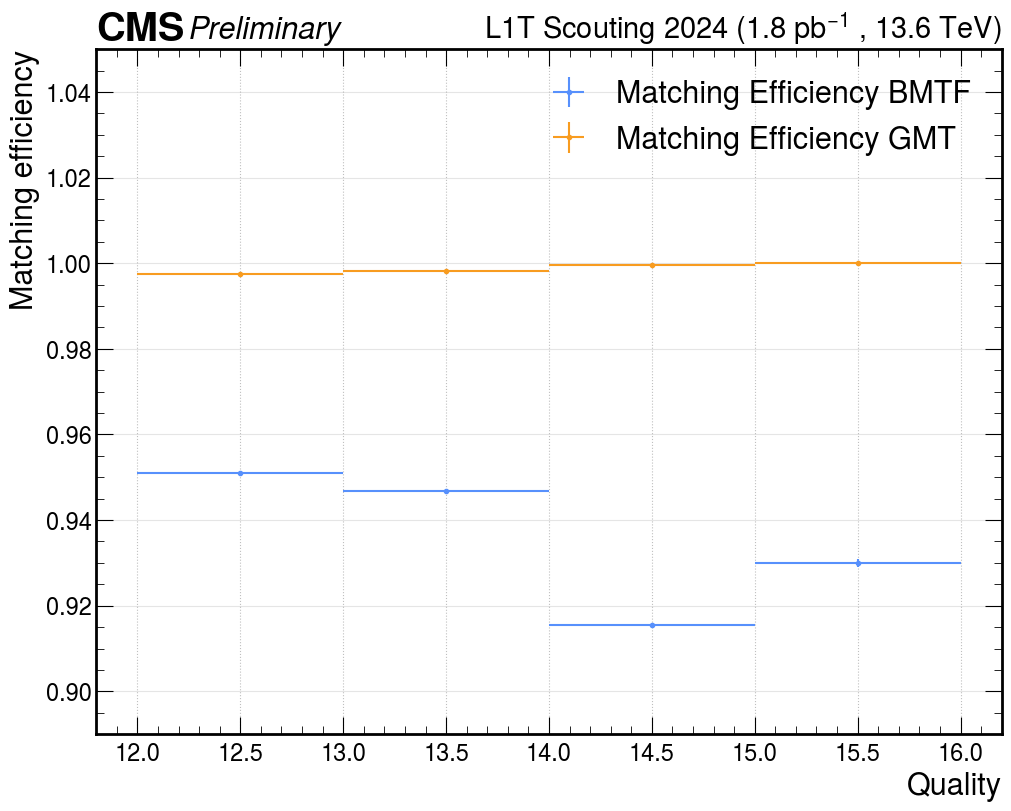

In [23]:
from hist import intervals
BMTFerror = hist.intervals.ratio_uncertainty(QualBMTF_Hist.values(), AllQualBMTF_Hist.values(), uncertainty_type = 'efficiency')
GMTerror = hist.intervals.ratio_uncertainty(QualGMT_Hist.values(), AllQualGMT_Hist.values(), uncertainty_type = 'efficiency')

centers = 0.5 * (binsQual[1:] + binsQual[:-1])
width = 0.5 * (binsQual[1:] - binsQual[:-1])

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

ax.errorbar(centers, BMTFMatchingEfficiencyQual, xerr = width, yerr = BMTFerror, fmt = '.', label="Matching Efficiency BMTF")
ax.errorbar(centers, GMTMatchingEfficiencyQual, xerr = width, yerr = GMTerror, fmt = '.', label="Matching Efficiency GMT")

ax.set_ylim(0.89, 1.05)
#ax.set_xlim(-10, 310)


ax.set_xlabel(r'Quality')
ax.set_ylabel('Matching efficiency')
ax.grid(True)
ax.legend(fontsize = FONTSIZE)

ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5)

plt.savefig("../Immagini/QualMatchingEfficiency.pdf")


plt.show()

# Grafici

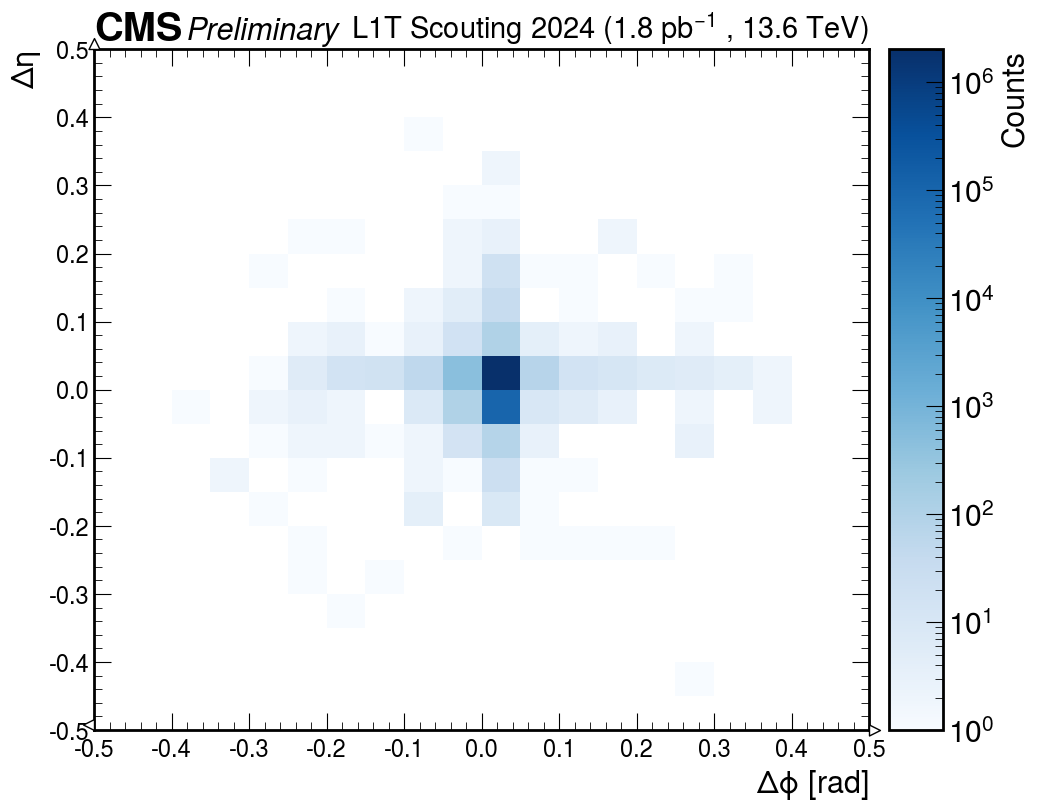

In [24]:
DeltaPhi_GMT = MuonsProperties.DeltaPhiGMT
DeltaEta_GMT = MuonsProperties.DeltaEtaGMT

a = 0.5
DeltaPhiRange = np.arange(-a, a, 0.05)
DeltaEtaRange = np.arange(-a, a, 0.05)

hist2d = hist.Hist(
    hist.axis.Variable(DeltaPhiRange, name='Phi'),
    hist.axis.Variable(DeltaEtaRange, name='Eta')

)
hist2d.fill(Phi=ak.flatten(DeltaPhi_GMT), Eta=ak.flatten(DeltaEta_GMT))


fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax,  norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('Counts', fontsize=FONTSIZE)

ax.set_xlabel(r'$\Delta \phi$ [rad]')
ax.set_ylabel(r'$\Delta \eta$')
ax.grid(False)
ax.set_xticks(np.arange(-0.5, 0.6, 0.1))
ax.set_yticks(np.arange(-0.5, 0.6, 0.1))

ax.tick_params(axis='both', which='both', labelsize = FONTSIZE - 5)


plt.savefig("../Immagini/DeltaR.pdf")

plt.show()

# Check Quality

In [25]:
BMTFQuality = ak.concatenate([bmtf_awk_LS133.bmtfHwQual, bmtf_awk_LS263.bmtfHwQual, bmtf_awk_LS264.bmtfHwQual, bmtf_awk_LS306.bmtfHwQual])
QPtBMTF = MuonsProperties.PtBMTF
Unmatched_BMTF = MuonsProperties.unmatched_Bmtf_Events

# LowPt = []
# Pt = []
# HighPt = []

# for i in tqdm.tqdm(range(len(BMTFQuality))):
#   if len(QPtBMTF[i]) != 0:
#     for j in range(len(QPtBMTF[i])):
#       if len(QPtBMTF[i]) > len(BMTFQuality[i]):
#         continue
#       elif QPtBMTF[i, j] < 10.5:
#         LowPt.append(BMTFQuality[i, j])
#         Pt.append(QPtBMTF[i, j])

#       elif QPtBMTF[i, j] > 99.5:
#         HighPt.append(BMTFQuality[i, j])
#         #print(BMTFQuality[i, j], QPtBMTF[i, j]

# AllPt = []

# for i in tqdm.tqdm(range(len(BMTFQuality))):
#   if len(QPtBMTF[i]) != 0:
#     for j in range(len(QPtBMTF[i])):
#       if len(QPtBMTF[i]) > len(BMTFQuality[i]):
#         continue
#       else:
#         AllPt.append(BMTFQuality[i, j])

In [26]:
# LowPt = ak.Array(LowPt)
# HighPt = ak.Array(HighPt)

# ak.to_parquet(LowPt, 'LowPt.parquet')
# ak.to_parquet(HighPt, 'HighPt.parquet')

# AllPt = ak.Array(AllPt)
# ak.to_parquet(AllPt, 'AllPt.parquet')

In [27]:
binsQ = np.array([12, 13, 14, 15, 16])

LowPtQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="LowPtQual", ))
HighPtQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="HighPtQual",))
AllPtQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="AllPtQual",))

LowPtQual_Hist.fill(LowPtQual=LowPt)
HighPtQual_Hist.fill(HighPtQual=HighPt)
AllPtQual_Hist.fill(AllPtQual=AllPt)


LowPtRatio_Qual = LowPtQual_Hist.values() / ak.sum(LowPtQual_Hist.values())
HighPtRatio_Qual = HighPtQual_Hist.values() / ak.sum(HighPtQual_Hist.values())
AllPtRatio_Qual = AllPtQual_Hist.values() / ak.sum(AllPtQual_Hist.values())

QualRatioLow = LowPtRatio_Qual / AllPtRatio_Qual
QualRatioHigh = HighPtRatio_Qual / AllPtRatio_Qual
QualRatio = HighPtRatio_Qual / LowPtRatio_Qual


print("Low Pt ratio: ", LowPtRatio_Qual)
print("High Pt ratio:", HighPtRatio_Qual)
print("---------------------------------------------------------")
#print("Quality ratio Low/All: ", QualRatioLow)
#print("Quality ratio High/All: ", QualRatioHigh)
print("Quality ratio High/Low: ", QualRatio)

SigmaLow = np.sqrt((LowPtRatio_Qual * (1 - LowPtRatio_Qual) / ak.sum(LowPtQual_Hist.values())))
SigmaHigh = np.sqrt((HighPtRatio_Qual * (1 - HighPtRatio_Qual) / ak.sum(HighPtQual_Hist.values())))


Error = QualRatio*np.sqrt((SigmaLow/LowPtRatio_Qual)**2 + (SigmaHigh/HighPtRatio_Qual)**2)
print(Error)

Low Pt ratio:  [0.6379431  0.3468877  0.01429552 0.00087368]
High Pt ratio: [0.57796258 0.38115038 0.03257103 0.00831601]
---------------------------------------------------------
Quality ratio High/Low:  [0.90597826 1.09877169 2.27840784 9.51833819]
[0.02038954 0.03688185 0.32732583 2.75154574]


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_98743/1221244983.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 10)


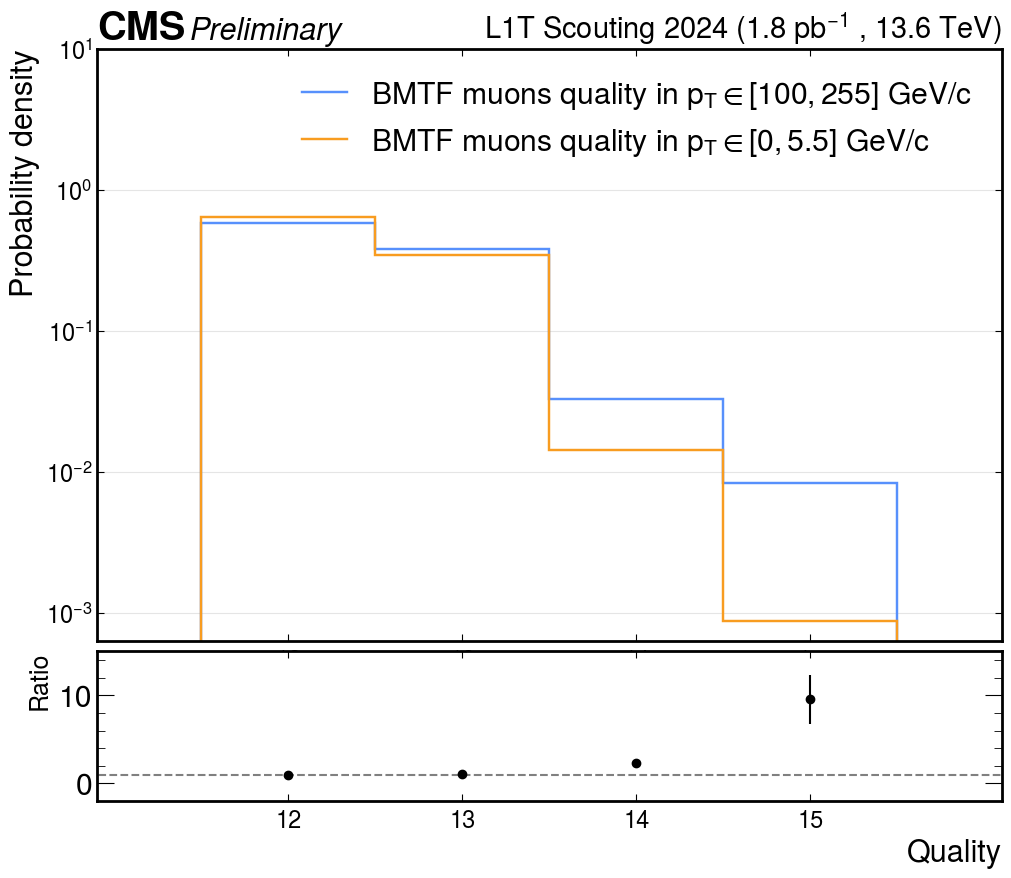

In [28]:
#High PT

from hist import intervals

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

hep.histplot(HighPtQual_Hist, label = r"BMTF muons quality in $p_T \in [100, 255]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density=True)
hep.histplot(LowPtQual_Hist, label=r"BMTF muons quality in $p_T \in [0, 5.5]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density = True)

ax.set_ylabel("Probability density", fontsize = FONTSIZE )
ax.legend(loc='upper right')

ax.set_yscale('log')
ax.set_ylim(0, 10)
ax.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)

ax.set_xticks(ticks=np.arange(12.5, 16.5), labels=np.arange(12, 16, 1))


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("bottom", 1.5, pad=0.1, sharex=ax)
ax2.tick_params(axis='x', which='minor', length=0, labelsize = FONTSIZE - 5)
ax2.tick_params(axis='x', which='major', length=5, labelsize = FONTSIZE - 5)

ax2.errorbar([12.5, 13.5, 14.5, 15.5], QualRatio, yerr = Error, fmt = 'o', c = 'black',)
ax2.hlines(1, 10.5, 18.5, color = 'gray', linestyle = 'dashed')

ax2.set_ylim(-2, 15)
ax2.set_xlim(11.4, 16.6)
ax2.set_ylabel("Ratio", fontsize = FONTSIZE - 4)
ax2.set_xlabel('Quality', fontsize = FONTSIZE )

plt.savefig("../Immagini/QualLowHighPt.pdf", bbox_inches='tight')


# Controllo (SEMPRE BMTF) nelle regioni a basso e alto momento di PHI e ETA 

In [29]:
BMTFEta = ak.concatenate([bmtf_awk_LS133.bmtfEta, bmtf_awk_LS263.bmtfEta, bmtf_awk_LS264.bmtfEta, bmtf_awk_LS306.bmtfEta])
BMTFPhi = ak.concatenate([bmtf_awk_LS133.bmtfPhi, bmtf_awk_LS263.bmtfPhi, bmtf_awk_LS264.bmtfPhi, bmtf_awk_LS306.bmtfPhi])
QPtBMTF = MuonsProperties.PtBMTF


LowPtEta, LowPtPhi = [], []

HighPtEta, HighPtPhi = [], []

for i in tqdm.tqdm(range(len(BMTFEta))):
  if len(QPtBMTF[i]) != 0:
    for j in range(len(QPtBMTF[i])):
      if len(QPtBMTF[i]) > len(BMTFEta[i]):
        continue
      elif QPtBMTF[i, j] < 5.5:
        LowPtEta.append(BMTFEta[i, j])
        LowPtPhi.append(BMTFPhi[i, j])

      elif QPtBMTF[i, j] > 99.5:
        HighPtEta.append(BMTFEta[i, j])
        HighPtPhi.append(BMTFPhi[i, j])

100%|██████████| 11604754/11604754 [12:12<00:00, 15847.98it/s]


In [30]:
#---------------------------------ETA--------------------------------------------------------
binsEta = np.arange(-1, 1.1, 0.2)

LowPtEta_Hist = hist.Hist(hist.axis.Variable(binsEta, name="LowPtEta", ))
HighPtEta_Hist = hist.Hist(hist.axis.Variable(binsEta, name="HighPtEta",))

LowPtEta_Hist.fill(LowPtEta=LowPtEta)
HighPtEta_Hist.fill(HighPtEta=HighPtEta)

LowPtRatio_Eta = LowPtEta_Hist.values() / ak.sum(LowPtEta_Hist.values())
HighPtRatio_Eta = HighPtEta_Hist.values() / ak.sum(HighPtEta_Hist.values())

EtaRatio = HighPtRatio_Eta / LowPtRatio_Eta

print("Eta ratio High/Low: ", EtaRatio)

SigmaLowEta = np.sqrt((LowPtRatio_Eta * (1 - LowPtRatio_Eta) / ak.sum(LowPtEta_Hist.values())))
SigmaHighEta = np.sqrt((HighPtRatio_Eta * (1 - HighPtRatio_Eta) / ak.sum(HighPtEta_Hist.values())))


ErrorEta = EtaRatio*np.sqrt((SigmaLowEta/LowPtRatio_Eta)**2 + (SigmaHighEta/HighPtRatio_Eta)**2)

#-----------------------------------PHI-----------------------------------------------------

binsPhi = np.array(np.arange(-np.pi, np.pi + 0.1, 0.52))

LowPtPhi_Hist = hist.Hist(hist.axis.Variable(binsPhi, name="LowPtPhi", ))
HighPtPhi_Hist = hist.Hist(hist.axis.Variable(binsPhi, name="HighPtPhi",))

LowPtPhi_Hist.fill(LowPtPhi=LowPtPhi)
HighPtPhi_Hist.fill(HighPtPhi=HighPtPhi)


LowPtRatio_Phi = LowPtPhi_Hist.values() / ak.sum(LowPtPhi_Hist.values())
HighPtRatio_Phi = HighPtPhi_Hist.values() / ak.sum(HighPtPhi_Hist.values())

PhiRatio = HighPtRatio_Phi / LowPtRatio_Phi

print("Phi ratio High/Low: ", PhiRatio)

SigmaLowPhi = np.sqrt((LowPtRatio_Phi * (1 - LowPtRatio_Phi) / ak.sum(LowPtPhi_Hist.values())))
SigmaHighPhi = np.sqrt((HighPtRatio_Phi * (1 - HighPtRatio_Phi) / ak.sum(HighPtPhi_Hist.values())))


ErrorPhi = PhiRatio*np.sqrt((SigmaLowPhi/LowPtRatio_Phi)**2 + (SigmaHighPhi/HighPtRatio_Phi)**2)
print("Error Phi: ", ErrorPhi)
print("Error Eta:", ErrorEta)

Eta ratio High/Low:  [0.89095788 0.58285352 0.94710046 1.44421264 0.95140475 1.43977989
 1.03109028 1.02116502 0.54753835 0.82918602]
Phi ratio High/Low:  [0.81651047 0.96043363 0.92329133 0.83726998 0.95372443 0.91158609
 1.15538706 1.07024135 1.15283194 1.27354996 1.03657355 0.94359563]
Error Phi:  [0.08191723 0.08359687 0.08223176 0.08036498 0.0837709  0.08235281
 0.09356865 0.09358412 0.09990555 0.09921576 0.08787008 0.08364957]
Error Eta: [0.16994139 0.0602276  0.05834828 0.10700286 0.08283146 0.06926291
 0.08977362 0.05778281 0.05763065 0.16122283]


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_98743/123224946.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 5)


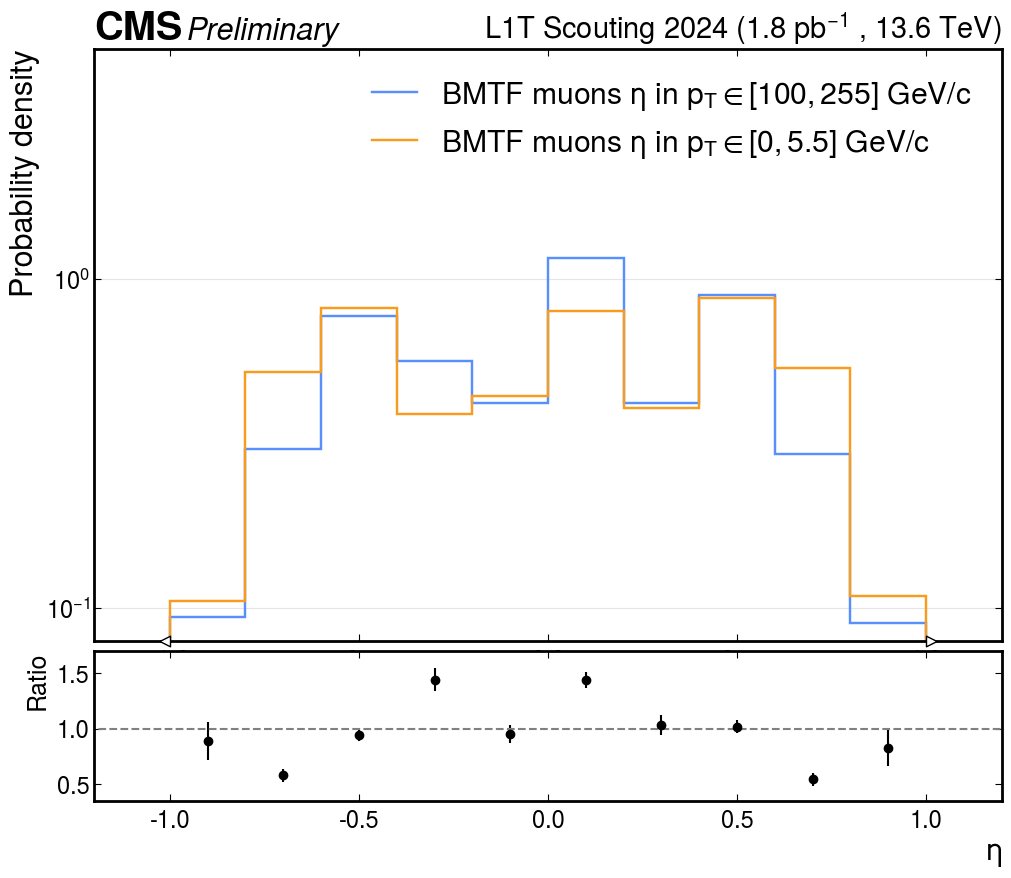

In [31]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

hep.histplot(HighPtEta_Hist, label = r"BMTF muons $\eta$ in $p_T \in [100, 255]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density=True)
hep.histplot(LowPtEta_Hist, label=r"BMTF muons $\eta$ in $p_T \in [0, 5.5]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density = True)

ax.set_ylabel("Probability density", fontsize = FONTSIZE )
ax.legend(loc='upper right')

ax.set_yscale('log')
ax.set_ylim(0, 5)
ax.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)

#ax.set_xticks(ticks=np.arange(12.5, 16.5), labels=np.arange(12, 16, 1))


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("bottom", 1.5, pad=0.1, sharex=ax)
ax2.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax2.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)

binsEta = np.arange(-1, 0.9, 0.2)

ax2.errorbar(binsEta + (binsEta[1] - binsEta[0])/2, EtaRatio, yerr = ErrorEta, fmt = 'o', c = 'black',)
ax2.hlines(1, -2, 2, color = 'gray', linestyle = 'dashed')

ax2.set_ylim(0.35, 1.7)
ax2.set_xlim(-1.2, 1.2)
ax2.set_ylabel("Ratio", fontsize = FONTSIZE - 4)
ax2.set_xlabel(r'$\eta$', fontsize = FONTSIZE )

plt.savefig("../Immagini/EtaLowHighPt.pdf", bbox_inches='tight')

Text(1, 0, 'Quality')

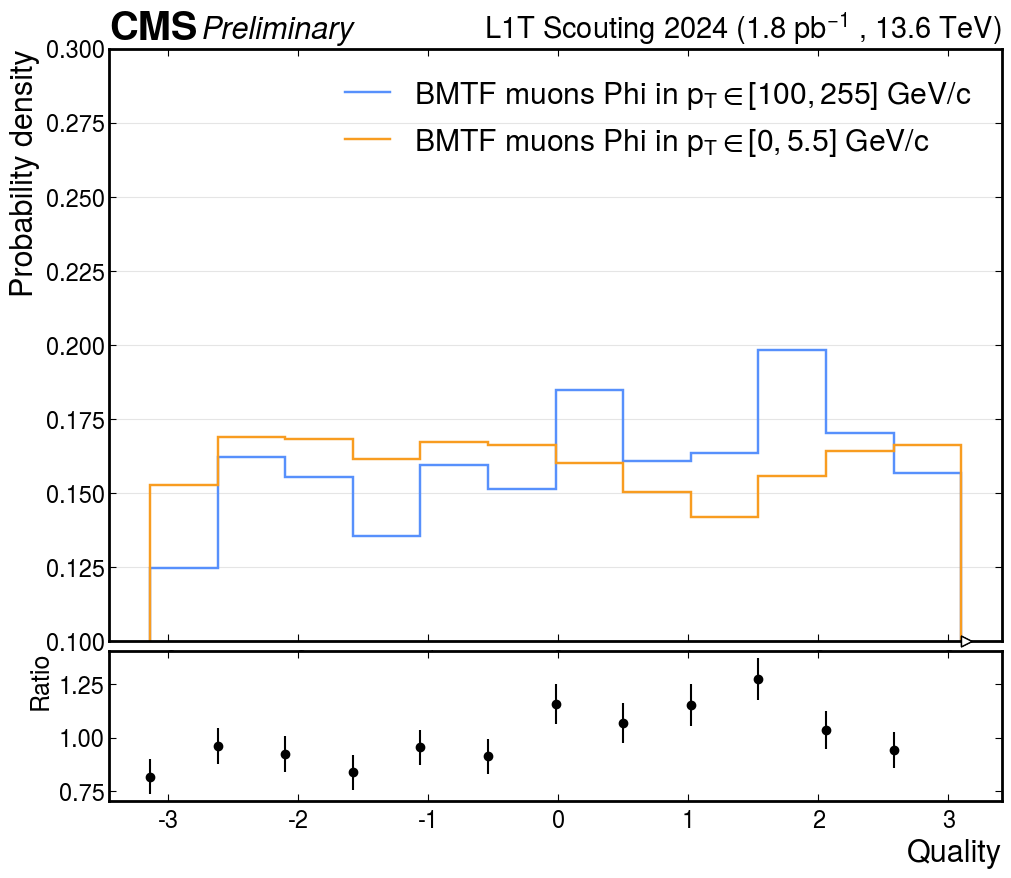

In [32]:
#------------------------------------------------------Grafico per PHI
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

hep.histplot(HighPtPhi_Hist, label = r"BMTF muons Phi in $p_T \in [100, 255]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density=True)
hep.histplot(LowPtPhi_Hist, label=r"BMTF muons Phi in $p_T \in [0, 5.5]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density = True)

ax.set_ylabel("Probability density", fontsize = FONTSIZE )
ax.legend(loc='upper right')

ax.set_ylim(0.1, 0.3)
ax.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)

#ax.set_xticks(ticks=np.arange(12.5, 16.5), labels=np.arange(12, 16, 1))


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("bottom", 1.5, pad=0.1, sharex=ax)
ax2.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax2.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)

binsPhi = np.array(np.arange(-np.pi, np.pi - 0.1, 0.52))

ax2.errorbar(binsPhi, PhiRatio, yerr = ErrorPhi, fmt = 'o', c = 'black',)
#ax2.hlines(1, 10.5, 18.5, color = 'gray', linestyle = 'dashed')

#ax2.set_ylim(-2, 15)
#ax2.set_xlim(11.4, 16.6)
ax2.set_ylabel("Ratio", fontsize = FONTSIZE - 4)
ax2.set_xlabel('Quality', fontsize = FONTSIZE )

# Controllo dei possibili duplicati 

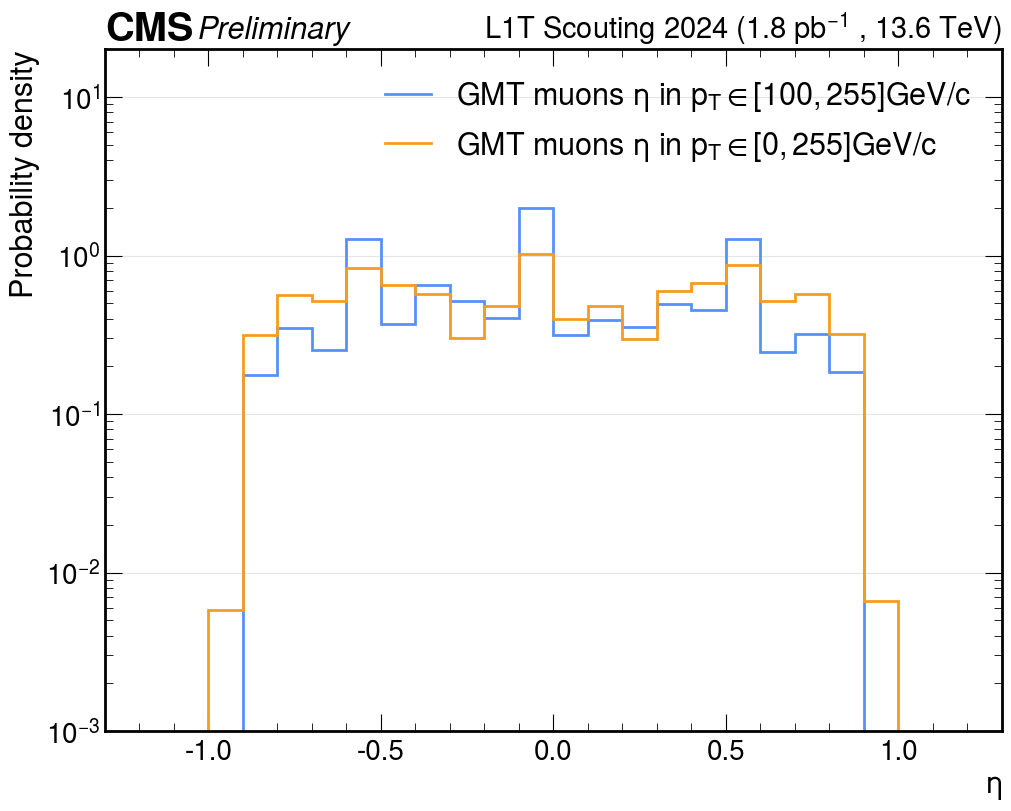

In [33]:
GmtEtaN = ak.flatten(GmtEta)

binsDup = np.array(np.arange(-1.2, 1.2, 0.1))

EtaDup_Hist = hist.Hist(hist.axis.Variable(binsDup, name="Eta", ))
AllEta_Hist = hist.Hist(hist.axis.Variable(binsDup, name="AllEta", ))

EtaDup_Hist.fill(Eta=EtaDup)
AllEta_Hist.fill(AllEta=GmtEtaN)

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)


hep.histplot(EtaDup_Hist, label = r"GMT muons $\eta$ in $p_T \in [100, 255] GeV/c$", ax=ax, yerr = False, lw = 2, density = True)
hep.histplot(AllEta_Hist, label = r"GMT muons $\eta$ in $p_T \in [0, 255] GeV/c$", ax=ax, yerr = False, lw = 2, density = True)

ax.set_yscale('log')
ax.set_xlabel(r"$\eta$")
ax.set_ylabel("Probability density")
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(0.001, 20)

ax.legend(fontsize = FONTSIZE)

plt.savefig("../Immagini/EtaHighPt.pdf")


<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_98743/3206162267.py:24: SyntaxWarning: invalid escape sequence '\e'
  ax.set_ylabel("$\eta$")


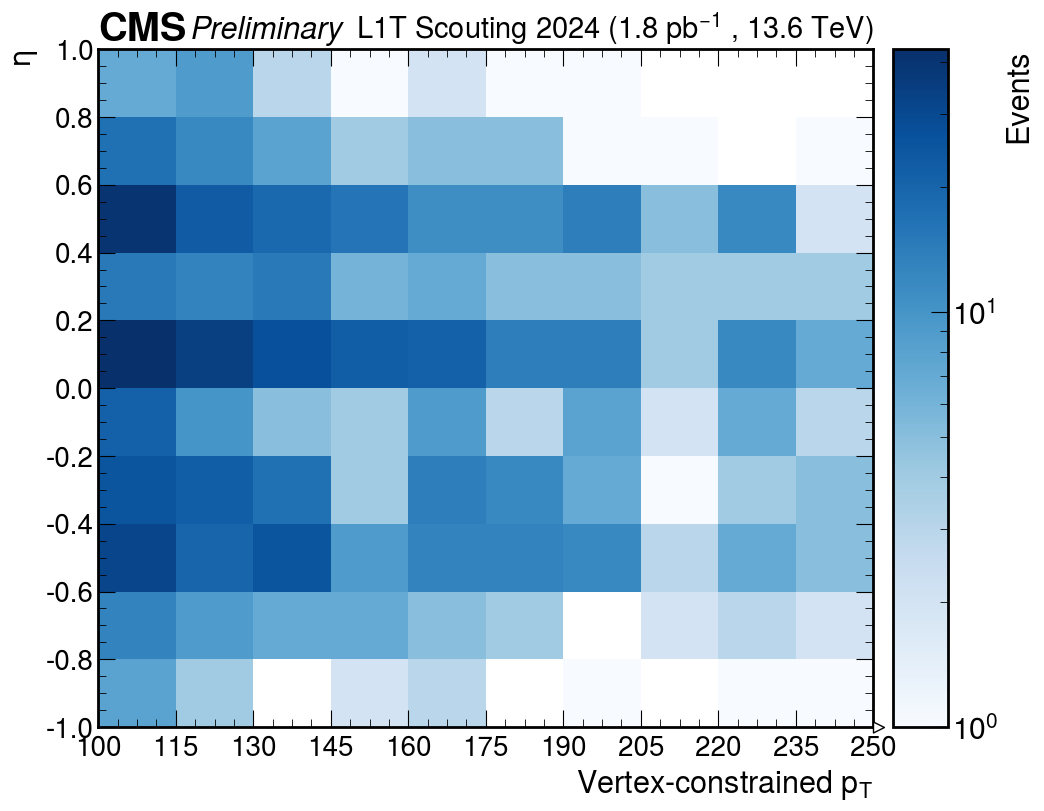

In [34]:
PtRange = np.arange(100, 265, 15)
EtaRange = np.arange(-1, 1.2, 0.2)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtRange, 2), name='Pt', label='Pt number'),
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
)

hist2d.fill(Pt=PtDup, Eta=EtaDup)

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
#draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())
cbar = ax.collections[0].colorbar
cbar.set_label('Events', fontsize=FONTSIZE)

ax.set_xlabel("Vertex-constrained $p_T$")
ax.set_ylabel("$\eta$")

plt.savefig("../Immagini/2DEtaHighPt.pdf")


In [ ]:
# gmtQuality = ak.concatenate([gmt_awk_LS133.gmtQual, gmt_awk_LS263.gmtQual, gmt_awk_LS264.gmtQual, gmt_awk_LS306.gmtQual])
# QPtGMT = MuonsProperties.PtGMT

# GMTLowPt = []
# Pt = []
# GMTHighPt = []

# for i in tqdm.tqdm(range(len(gmtQuality))):
#   if len(QPtGMT[i]) != 0:
#     for j in range(len(QPtGMT[i])):
#       if len(QPtGMT[i]) > len(gmtQuality[i]):
#         continue
#       elif QPtGMT[i, j] < 5.5:
#         GMTLowPt.append(gmtQuality[i, j])

#       elif QPtGMT[i, j] > 99.5:
#         GMTHighPt.append(gmtQuality[i, j])

In [ ]:
# GMTLowPt = ak.Array(GMTLowPt)
# GMTHighPt = ak.Array(GMTHighPt)

# ak.to_parquet(GMTLowPt, 'GMTLowPt.parquet')
# ak.to_parquet(GMTHighPt, 'GMTHighPt.parquet')

  created_by: parquet-cpp-arrow version 14.0.2
  num_columns: 1
  num_rows: 1465
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [ ]:
binsQ = np.array([12, 13, 14, 15, 16])

LowPtQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="LowPtQual", ))
HighPtQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="HighPtQual",))

LowPtQual_Hist.fill(LowPtQual=GMTLowPt)
HighPtQual_Hist.fill(HighPtQual=GMTHighPt)


LowPtRatio_Qual = LowPtQual_Hist.values() / ak.sum(LowPtQual_Hist.values())
HighPtRatio_Qual = HighPtQual_Hist.values() / ak.sum(HighPtQual_Hist.values())


QualRatio = HighPtRatio_Qual / LowPtRatio_Qual



print("Quality ratio High/Low: ", QualRatio)

SigmaLow = np.sqrt((LowPtRatio_Qual * (1 - LowPtRatio_Qual) / ak.sum(LowPtQual_Hist.values())))
SigmaHigh = np.sqrt((HighPtRatio_Qual * (1 - HighPtRatio_Qual) / ak.sum(HighPtQual_Hist.values())))


Error = QualRatio*np.sqrt((SigmaLow/LowPtRatio_Qual)**2 + (SigmaHigh/HighPtRatio_Qual)**2)
print(Error)

Quality ratio High/Low:  [ 0.89491576  1.11422727  2.2246099  25.10020424]
[0.02037485 0.03639895 0.32693101 6.54395268]


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_54522/4157212103.py:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 10)


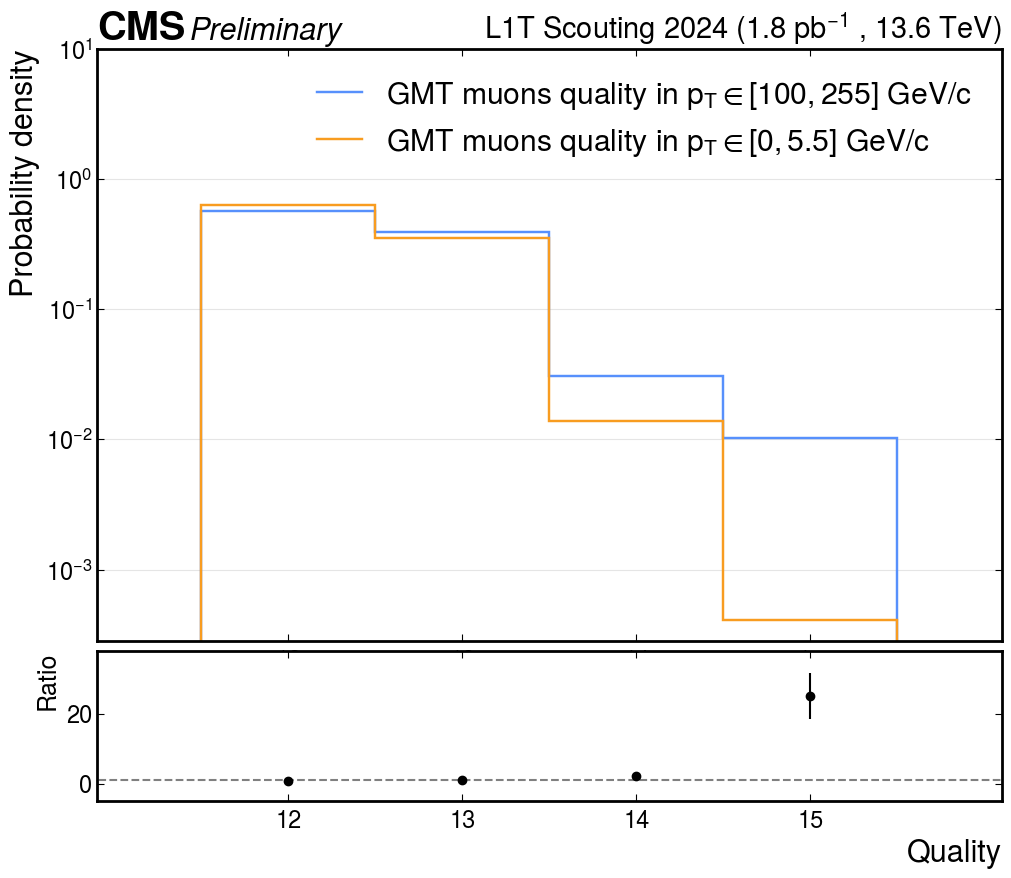

In [ ]:
#High PT

from hist import intervals

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

hep.histplot(HighPtQual_Hist, label = r"GMT muons quality in $p_T \in [100, 255]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density=True)
hep.histplot(LowPtQual_Hist, label=r"GMT muons quality in $p_T \in [0, 5.5]$ GeV/c", ax=ax, yerr = False, lw = 1.75, density = True)

ax.set_ylabel("Probability density", fontsize = FONTSIZE )
ax.legend(loc='upper right')

ax.set_yscale('log')
ax.set_ylim(0, 10)
ax.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)

ax.set_xticks(ticks=np.arange(12.5, 16.5), labels=np.arange(12, 16, 1))


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("bottom", 1.5, pad=0.1, sharex=ax)
ax2.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax2.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)

ax2.errorbar([12.5, 13.5, 14.5, 15.5], QualRatio, yerr = Error, fmt = 'o', c = 'black',)
ax2.hlines(1, 10.5, 18.5, color = 'gray', linestyle = 'dashed')

ax2.set_ylim(-5, 38)
ax2.set_xlim(11.4, 16.6)
ax2.set_ylabel("Ratio", fontsize = FONTSIZE - 4)
ax2.set_xlabel('Quality', fontsize = FONTSIZE )

plt.savefig("../Immagini/GMTQualLowHighPt.pdf", bbox_inches='tight')


# Controllo Phi

In [ ]:
CPhiBMTF = MuonMatchEff.PhiBmtf
Unmatched_BMTF = MuonMatchEff.unmatched_Bmtf_Events
CQualityBMTF = MuonMatchEff.QualBmtf
CPtBMTF = MuonsProperties.PtBMTF
len(CQualityBMTF)/2

5802377.0

In [ ]:
'''Quality = []
Pt = []

LowMEPhi = [[], []]
HighMEPhi = [[], []]
AllMEPhi = [[], []]

for i in tqdm.tqdm(range(int(len(CQualityBMTF)))):
    if len(CQualityBMTF[i]) != 0:
        for j in range(len(CQualityBMTF[i])):
            # Verifica che gli array siano della stessa lunghezza
            if len(CQualityBMTF[i]) > len(CPtBMTF[i]):
                continue
            
            # Controllo per HighMEPhi
            if -1.58 < CPhiBMTF[i, j] < -1.06:
                HighMEPhi[0].append(CQualityBMTF[i, j])
                HighMEPhi[1].append(CPtBMTF[i, j])

            # Controllo per LowMEPhi
            elif 1.02 < CPhiBMTF[i, j] < 1.54:
                LowMEPhi[0].append(CQualityBMTF[i, j])
                LowMEPhi[1].append(CPtBMTF[i, j])

            # Popolo AllMEPhi con tutti i dati
            AllMEPhi[0].append(CQualityBMTF[i, j])
            AllMEPhi[1].append(CPtBMTF[i, j])'''


'Quality = []\nPt = []\n\nLowMEPhi = [[], []]\nHighMEPhi = [[], []]\nAllMEPhi = [[], []]\n\nfor i in tqdm.tqdm(range(int(len(CQualityBMTF)))):\n    if len(CQualityBMTF[i]) != 0:\n        for j in range(len(CQualityBMTF[i])):\n            # Verifica che gli array siano della stessa lunghezza\n            if len(CQualityBMTF[i]) > len(CPtBMTF[i]):\n                continue\n            \n            # Controllo per HighMEPhi\n            if -1.58 < CPhiBMTF[i, j] < -1.06:\n                HighMEPhi[0].append(CQualityBMTF[i, j])\n                HighMEPhi[1].append(CPtBMTF[i, j])\n\n            # Controllo per LowMEPhi\n            elif 1.02 < CPhiBMTF[i, j] < 1.54:\n                LowMEPhi[0].append(CQualityBMTF[i, j])\n                LowMEPhi[1].append(CPtBMTF[i, j])\n\n            # Popolo AllMEPhi con tutti i dati\n            AllMEPhi[0].append(CQualityBMTF[i, j])\n            AllMEPhi[1].append(CPtBMTF[i, j])'

In [ ]:
'''LowMEPhi = ak.Array(LowMEPhi)
HighMEPhi = ak.Array(HighMEPhi)
AllMEPhi = ak.Array(AllMEPhi)

ak.to_parquet(LowMEPhi, "LowMEPhi.parquet")
ak.to_parquet(HighMEPhi, "HighMEPhi.parquet")
ak.to_parquet(AllMEPhi, "AllMEPhi.parquet")'''

'LowMEPhi = ak.Array(LowMEPhi)\nHighMEPhi = ak.Array(HighMEPhi)\nAllMEPhi = ak.Array(AllMEPhi)\n\nak.to_parquet(LowMEPhi, "LowMEPhi.parquet")\nak.to_parquet(HighMEPhi, "HighMEPhi.parquet")\nak.to_parquet(AllMEPhi, "AllMEPhi.parquet")'

In [ ]:
binsQ = np.array([12, 13, 14, 15, 16])

LowMEQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="LowMEQual", ))
HighMEQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="HighMEQual",))
AllMEQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="AllMEQual",))

LowMEQual_Hist.fill(LowMEQual= ak.flatten(LowMEPhi))
HighMEQual_Hist.fill(HighMEQual=ak.flatten(HighMEPhi))
AllMEQual_Hist.fill(AllMEQual=ak.flatten(AllMEPhi))

LowMERatio_Qual = LowMEQual_Hist.values() / ak.sum(LowMEQual_Hist.values())
HighMERatio_Qual = HighMEQual_Hist.values() / ak.sum(HighMEQual_Hist.values())
AllMERatio_Qual = AllMEQual_Hist.values() / ak.sum(AllMEQual_Hist.values())

QualMERatio = HighMERatio_Qual / LowMERatio_Qual


print("Low ME ratio: ", LowMERatio_Qual)
print("High ME ratio:", HighMERatio_Qual)
print("---------------------------------------------------------")
print("Quality ratio High/Low: ", QualMERatio)


Low ME ratio:  [0.47293022 0.37796667 0.1121147  0.03698841]
High ME ratio: [0.47970781 0.36507147 0.11250905 0.04271167]
---------------------------------------------------------
Quality ratio High/Low:  [1.01433108 0.96588272 1.00351733 1.15473091]


# Controllo qualità a bassi momenti 

In [ ]:
BMTFQuality = ak.concatenate([bmtf_awk_LS133.bmtfHwQual, bmtf_awk_LS263.bmtfHwQual, bmtf_awk_LS264.bmtfHwQual, bmtf_awk_LS306.bmtfHwQual])
QPtBMTF = MuonsProperties.PtBMTF
Unmatched_BMTF = MuonsProperties.unmatched_Bmtf_Events

Pt = []
Quality = []

for i in tqdm.tqdm(range(len(BMTFQuality))):
  if len(QPtBMTF[i]) != 0:
    for j in range(len(QPtBMTF[i])):
      if len(QPtBMTF[i]) > len(BMTFQuality[i]):
        continue
      elif 5.1 < QPtBMTF[i, j] < 14.9:
        Quality.append(BMTFQuality[i, j])

AllQual = []

for i in tqdm.tqdm(range(len(BMTFQuality))):
  if len(QPtBMTF[i]) != 0:
    for j in range(len(QPtBMTF[i])):
      if len(QPtBMTF[i]) > len(BMTFQuality[i]):
        continue
      else:
        AllQual.append(BMTFQuality[i, j])

100%|██████████| 11604754/11604754 [07:23<00:00, 26156.40it/s]


In [ ]:
binsQ = np.array([12, 13, 14, 15, 16])

CenterPtQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="CenterPtQual", ))
AllPtQual_Hist = hist.Hist(hist.axis.Variable(binsQ, name="AllPtQual",))

CenterPtQual_Hist.fill(CenterPtQual=Quality)
AllPtQual_Hist.fill(AllPtQual=AllQual)


CenterPtRatio_Qual = CenterPtQual_Hist.values() / ak.sum(CenterPtQual_Hist.values())
AllPtRatio_Qual = AllPtQual_Hist.values() / ak.sum(AllPtQual_Hist.values())

print(CenterPtRatio_Qual)
print(AllPtRatio_Qual)


QualRatio = AllPtRatio_Qual / CenterPtRatio_Qual 


print("Quality ratio High/Low: ", QualRatio)

SigmaCenter = np.sqrt((CenterPtRatio_Qual * (1 - CenterPtRatio_Qual) / ak.sum(CenterPtQual_Hist.values())))
SigmaAll = np.sqrt((AllPtRatio_Qual * (1 - AllPtRatio_Qual) / ak.sum(AllPtQual_Hist.values())))

Error = QualRatio*np.sqrt((SigmaCenter/CenterPtRatio_Qual)**2 + (SigmaAll/AllPtRatio_Qual)**2)
print(Error)

[0.26824492 0.40025137 0.23987415 0.09162956]
[0.48352157 0.36724794 0.10882033 0.04041016]
Quality ratio High/Low:  [1.80253769 0.91754325 0.45365593 0.44101657]
[0.00346533 0.00146882 0.0012465  0.00210308]


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_54522/141318201.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 5)


Text(1, 0, 'Quality')

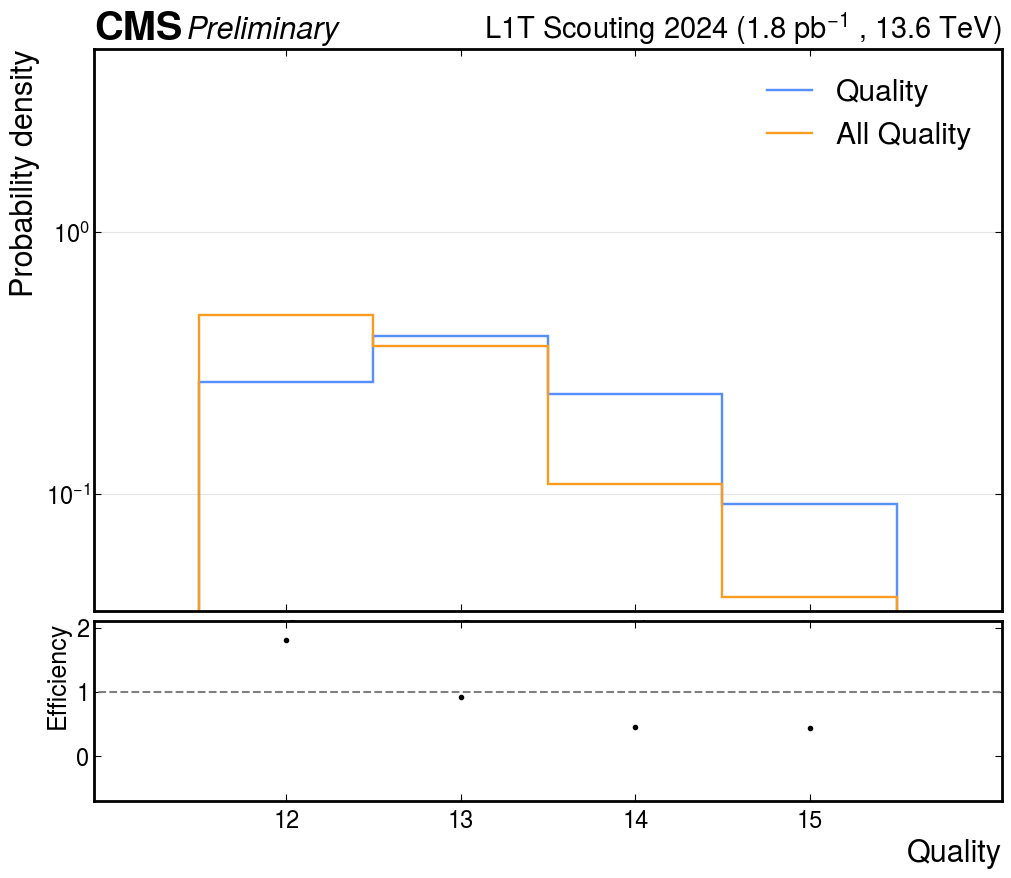

In [ ]:
#High PT

from hist import intervals
#Error = hist.intervals.ratio_uncertainty(EtaPtLeft_Hist.values(), np.sum(EtaPtLeft_Hist.values()), uncertainty_type = 'efficiency')

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

#ax.hist(PtBMTF_Hist.values(), bins=bins, label="BMTF")
#ax.hist(AllPtBMTF_Hist.values(), bins=bins, label="All BMTF")

hep.histplot(CenterPtQual_Hist, label=r"Quality", ax=ax, yerr = False, lw = 1.75, density = True)
hep.histplot(AllPtQual_Hist, label = "All Quality", ax=ax, yerr = False, lw = 1.7, density= True)

ax.set_ylabel("Probability density", fontsize = FONTSIZE )
ax.legend(loc='upper right')

ax.set_yscale('log')
ax.set_ylim(0, 5)

ax.set_xticks(ticks=np.arange(12.5, 16.5), labels=np.arange(12, 16, 1))

ax.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("bottom", 1.8, pad=0.1, sharex=ax)
ax2.tick_params(axis='both', which='minor', length=0, labelsize = FONTSIZE - 5)
ax2.tick_params(axis='both', which='major', length=5, labelsize = FONTSIZE - 5)
ax2.errorbar([12.5, 13.5, 14.5, 15.5], QualRatio, yerr = Error, fmt = '.', c = 'black', zorder = 100)
ax2.set_ylim(-0.7, 2.1)
ax2.hlines(1, 10.6, 17.6, color='gray', linestyle = 'dashed')
ax2.set_xlim(11.4, 16.6)
ax2.set_ylabel("Efficiency", fontsize = FONTSIZE - 4)
ax2.set_xlabel('Quality', fontsize = FONTSIZE )

#plt.savefig("../Immagini/QualLowHighPt.pdf")
